## Machine Learning Mini Project

## Medical Chatbot


---



## *I060 I064 I068*

In [89]:
# Importing reqd libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [90]:
# Reading the dataset
df = pd.read_csv('/content/ml_db.csv')
df.head()

,skin_rash,continuous_sneezing,shivering,joint_pain,stomach_pain,acidity,vomiting,fatigue,anxiety,mood_swings,...,loss_of_smell,depression,red_spots_over_body,receiving_blood_transfusion,history_of_alcohol_consumption,pus_filled_pimples,inflammatory_nails,blister,red_sore_around_nose,prognosis
0,Yes,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Fungal infection
1,Yes,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Fungal infection
2,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Fungal infection
3,Yes,No,No,No,No,No,NaN,No,No,No,...,No,No,No,No,No,No,NaN,No,No,Fungal infection
4,Yes,No,No,NaN,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Fungal infection


## Data Preprocessing 

In [91]:
df.shape

(4920, 38)

In [92]:
df.size

186960

In [93]:
df.dtypes

skin_rash                         object
continuous_sneezing               object
shivering                         object
joint_pain                        object
stomach_pain                      object
acidity                           object
vomiting                          object
fatigue                           object
anxiety                           object
mood_swings                       object
lethargy                          object
cough                             object
high_fever                        object
breathlessness                    object
dehydration                       object
headache                          object
back_pain                         object
diarrhoea                         object
throat_irritation                 object
redness_of_eyes                   object
runny_nose                        object
neck_pain                         object
cramps                            object
bruising                          object
puffy_face_and_e

In [94]:
df.describe()

,skin_rash,continuous_sneezing,shivering,joint_pain,stomach_pain,acidity,vomiting,fatigue,anxiety,mood_swings,...,loss_of_smell,depression,red_spots_over_body,receiving_blood_transfusion,history_of_alcohol_consumption,pus_filled_pimples,inflammatory_nails,blister,red_sore_around_nose,prognosis
count,4919,4914,4914,4913,4911,4907,4912,4915,4912,4909,...,4916,4916,4912,4918,4913,4913,4909,4911,4918,4920
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,41
top,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Fungal infection
freq,4133,4692,4806,4229,4689,4685,2999,2983,4798,4681,...,4796,4682,4678,4798,4799,4805,4795,4797,4804,120


In [95]:
#Count of unique diseases in the data set
df['prognosis'].nunique()

41

In [96]:
# Printing all the symptoms in the dataset
columns = df.columns[:37]
print(columns)

Index(['skin_rash', 'continuous_sneezing', 'shivering', 'joint_pain',
       'stomach_pain', 'acidity', 'vomiting', 'fatigue', 'anxiety',
       'mood_swings', 'lethargy', 'cough', 'high_fever', 'breathlessness',
       'dehydration', 'headache', 'back_pain', 'diarrhoea',
       'throat_irritation', 'redness_of_eyes', 'runny_nose', 'neck_pain',
       'cramps', 'bruising', 'puffy_face_and_eyes', 'extra_marital_contacts',
       'muscle_weakness', 'loss_of_balance', 'loss_of_smell', 'depression',
       'red_spots_over_body', 'receiving_blood_transfusion',
       'history_of_alcohol_consumption', 'pus_filled_pimples',
       'inflammatory_nails', 'blister', 'red_sore_around_nose'],
      dtype='object')


In [97]:
df.isnull().sum()

skin_rash                          1
continuous_sneezing                6
shivering                          6
joint_pain                         7
stomach_pain                       9
acidity                           13
vomiting                           8
fatigue                            5
anxiety                            8
mood_swings                       11
lethargy                          13
cough                              5
high_fever                         8
breathlessness                     7
dehydration                       10
headache                          10
back_pain                          3
diarrhoea                          9
throat_irritation                 11
redness_of_eyes                    6
runny_nose                         8
neck_pain                          7
cramps                             7
bruising                           2
puffy_face_and_eyes                2
extra_marital_contacts             2
muscle_weakness                    3
l

In [98]:
for i in df.columns:
  df[i] = df[i].replace(to_replace = np.NaN, value = df[i].mode()[0])

In [99]:
df.isnull().sum()

skin_rash                         0
continuous_sneezing               0
shivering                         0
joint_pain                        0
stomach_pain                      0
acidity                           0
vomiting                          0
fatigue                           0
anxiety                           0
mood_swings                       0
lethargy                          0
cough                             0
high_fever                        0
breathlessness                    0
dehydration                       0
headache                          0
back_pain                         0
diarrhoea                         0
throat_irritation                 0
redness_of_eyes                   0
runny_nose                        0
neck_pain                         0
cramps                            0
bruising                          0
puffy_face_and_eyes               0
extra_marital_contacts            0
muscle_weakness                   0
loss_of_balance             

In [100]:
# Label encoding to convert categorical data to numerical data
label_encoder = LabelEncoder()
for x in df.columns:
  df[x] = label_encoder.fit_transform(df[x])
df.head()

,skin_rash,continuous_sneezing,shivering,joint_pain,stomach_pain,acidity,vomiting,fatigue,anxiety,mood_swings,...,loss_of_smell,depression,red_spots_over_body,receiving_blood_transfusion,history_of_alcohol_consumption,pus_filled_pimples,inflammatory_nails,blister,red_sore_around_nose,prognosis
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


## Model Training

In [101]:
# Splitting the data into input and output
x = df.iloc[:, :37].values
y = df['prognosis'].values

In [102]:
#Splitting the data into train and test using 80:20 split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
# Defining diff ml models 
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()

In [104]:
# Defining ensemble model that using voting to classify the data
ensemble = VotingClassifier(estimators=[('dt', model_dt), ('nb', model_nb), ('knn', model_knn)], voting='hard')

In [105]:
# Training the model
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('knn', KNeighborsClassifier())])

In [106]:
# Predicting the test set
y_pred = ensemble.predict(x_test)

In [107]:
print(y_pred)

[15  2 24  1  9 23 25  5 19 30 38 12 21 35  3  3 38 22 12  7 34 40 19 34
  4 20 34 30 26 30  9 19 17 21 39 30 28 14 34 38 20  0 23 12 28 17 25 19
 35 35 18 36 39  4 24 20 37 10 38  9 25 24 36 18  0 26 32  1  0 38 15 34
  2 22 26  9 27 27 10 30 16 27 16 14 19  1 28 17 23 11 26 29 21  3 36 17
 29 18 34 11 23 34  3  4  9 39 16 30 22  1 21 39 18 25 12 14 26 28 25  3
  7 35 32  8  5 34 17 24 35 31 11  7  7  7  9  2 19 34 38 37  9 18 35 19
 21 31 14 39 36  3 20 31  9 37 23 37 25 21  3  4  6 28  1 18 40 37 29 34
 27 24 21 21 40 17 34 27  1 40 10  8 29  1  4 40 30 37 12 19 11 38 37  2
 39 34 22  8 15  7 19 31 17 40 39 11 15  0 16  4  9  8 19 31 18 38 17 28
 29 18  9 21 11  3  3 23 32 40  8 17 26 35  5 38 37 34 35 14 31 34 12  5
 10 20  4 39 32 34 36  9 32 18 19 22 38 11 27 34 38 10 10  1 18 10 10 14
 32 26 10  8 38 25 26  5 29 37 26 16 30 27 34  1 37 24 17 35 24  9 34 36
 12  9 16 11 22 40 38 11 19 14  1 15 36  6 27 22 35 19 23 31 16 32 20 15
  9  1 25  7 34 20 38 15 40 22 30 16 38 30 23  1  6

In [108]:
# Performing inverse label encoding to obtain the original values
y_predL = label_encoder.inverse_transform(y_pred)

In [109]:
print(y_predL)

['Fungal infection' 'Acne' 'Hyperthyroidism' 'AIDS' 'Chronic cholestasis'
 'Hypertension ' 'Hypoglycemia' 'Arthritis' 'Hepatitis B' 'Migraine'
 'Urinary tract infection' 'Diabetes ' 'Hepatitis D' 'Psoriasis'
 'Alcoholic hepatitis' 'Alcoholic hepatitis' 'Urinary tract infection'
 'Hepatitis E' 'Diabetes ' 'Cervical spondylosis' 'Pneumonia'
 'hepatitis A' 'Hepatitis B' 'Pneumonia' 'Allergy' 'Hepatitis C'
 'Pneumonia' 'Migraine' 'Hypothyroidism' 'Migraine' 'Chronic cholestasis'
 'Hepatitis B' 'Gastroenteritis' 'Hepatitis D' 'Varicose veins' 'Migraine'
 'Jaundice' 'Drug Reaction' 'Pneumonia' 'Urinary tract infection'
 'Hepatitis C' '(vertigo) Paroymsal  Positional Vertigo' 'Hypertension '
 'Diabetes ' 'Jaundice' 'Gastroenteritis' 'Hypoglycemia' 'Hepatitis B'
 'Psoriasis' 'Psoriasis' 'Heart attack' 'Tuberculosis' 'Varicose veins'
 'Allergy' 'Hyperthyroidism' 'Hepatitis C' 'Typhoid' 'Common Cold'
 'Urinary tract infection' 'Chronic cholestasis' 'Hypoglycemia'
 'Hyperthyroidism' 'Tuberculosis

## Model Evaluation

<Axes: >

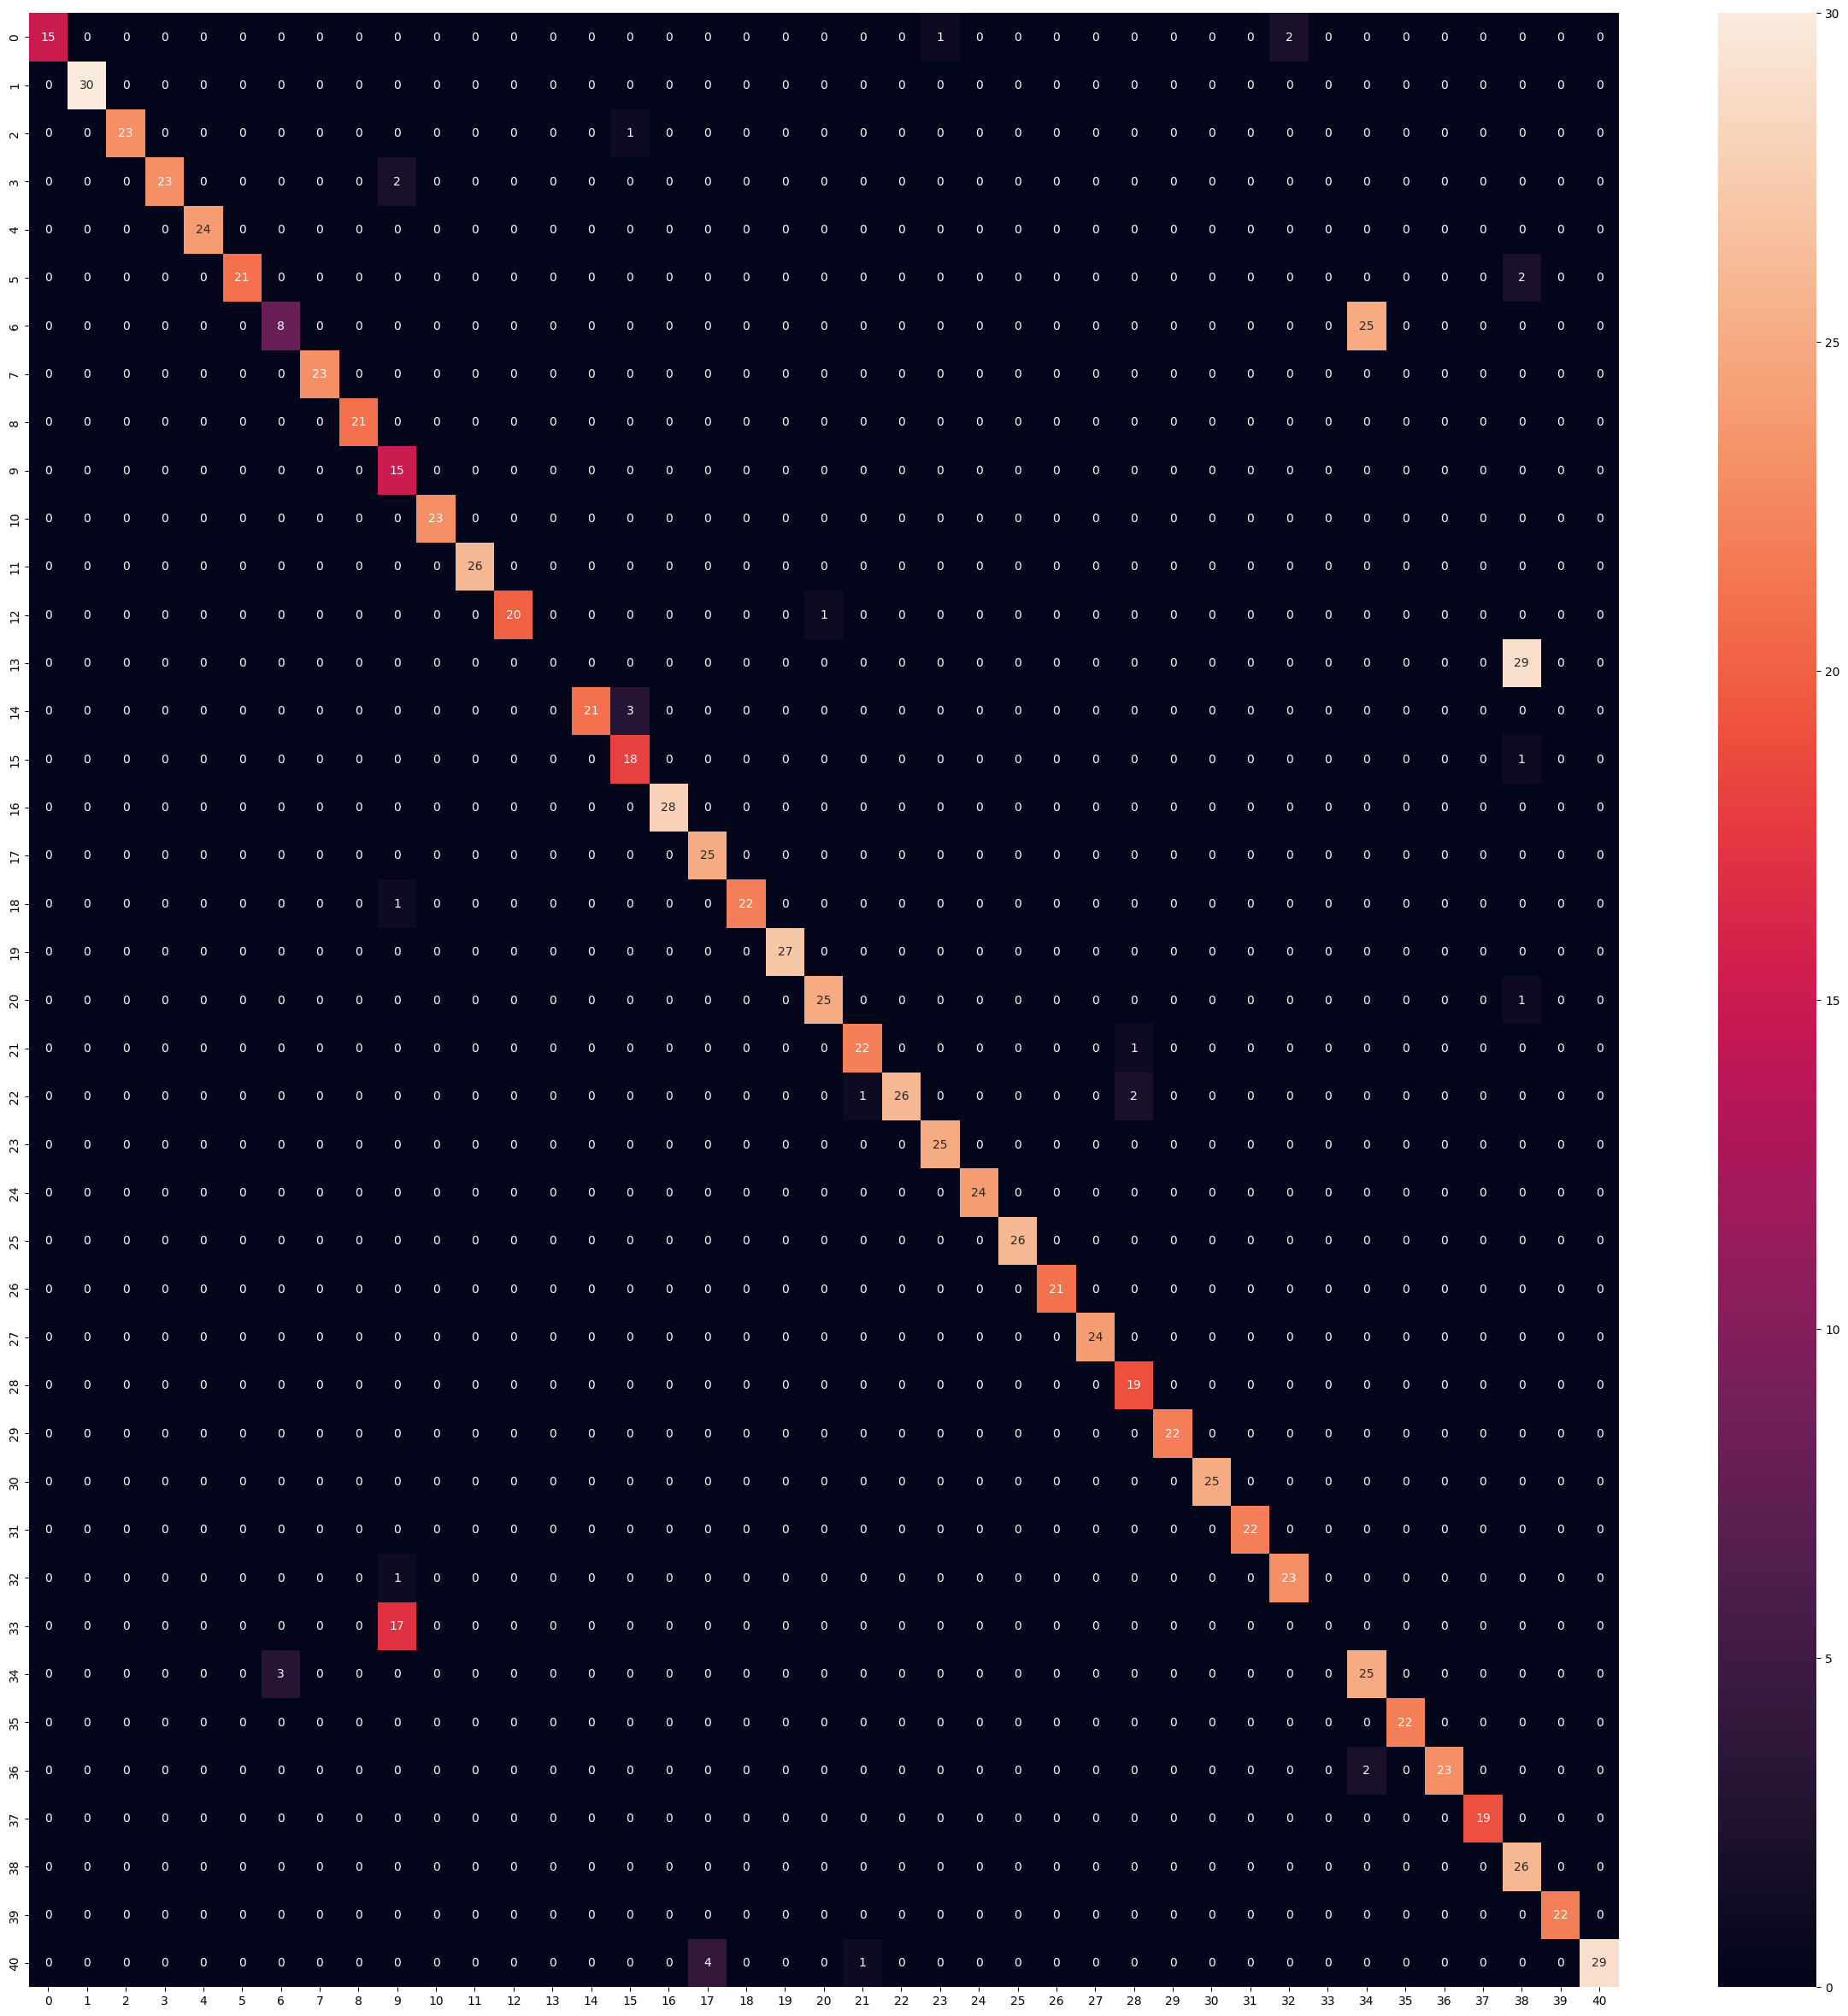

In [110]:
# Printing confusion matrix
fig, ax = plt.subplots(figsize=(30, 30))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt= 'd')

In [111]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.8973577235772358


In [112]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print('Precision: ',precision)
print('\nRecall: ',recall)
print('\nF1 Score: ',f1)

Precision:  0.8901191362240385

Recall:  0.8973577235772358

F1 Score:  0.8821780965177337


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      1.00      1.00        30
           2       1.00      0.96      0.98        24
           3       1.00      0.92      0.96        25
           4       1.00      1.00      1.00        24
           5       1.00      0.91      0.95        23
           6       0.73      0.24      0.36        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       0.42      1.00      0.59        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      0.95      0.98        21
          13       0.00      0.00      0.00        29
          14       1.00      0.88      0.93        24
          15       0.82      0.95      0.88        19
          16       1.00      1.00      1.00        28
          17       0.86    